In [1]:
import pandas as pd 
import numpy as np

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df=pd.read_csv(r'C:\Users\m_joekid\Desktop\Movie Success\df_copy.csv')

In [5]:
del(df['Unnamed: 0'])  

In [6]:
df.sample(3)

,cast,crew,budget,genres,keywords,original_language,original_title,popularity,production_companies,production_countries,revenue,runtime,status,vote_average,vote_count,release_year,release_month,release_quarter
213,"['Ioan Gruffudd', 'Jessica Alba', 'Chris Evans']",['Tim Story'],130000000,"['Adventure', 'Fantasy', 'Action', 'Thriller']","['fire', 'helicopter', 'surfboard', 'mask', 's...",en,4: Rise of the Silver Surfer,60.810723,"['Ingenious Film Partners', 'Twentieth Century...","['Germany', 'United Kingdom', 'United States o...",289047763,92.0,Released,5.4,2589,2007,6,2
604,"['Colin Firth', 'Ben Kingsley', 'Aishwarya Rai...",['Doug Lefler'],67000000,"['Action', 'Adventure', 'Fantasy', 'War']","['roman empire', 'emperor', 'ancient rome', 'w...",en,The Last Legion,12.282911,"['Ingenious Film Partners', 'Quinta Communicat...","['United Kingdom', 'Italy', 'France', 'Tunisia']",25303038,102.0,Released,5.0,207,2007,4,2
2525,"['Ice Cube', 'Mike Epps', 'Justin Pierce']",['Steve Carr'],11000000,['Comedy'],"['prison', 'repayment', 'gang war', 'boy gang'...",en,Next Friday,9.337388,['New Line Cinema'],['United States of America'],59827328,98.0,Released,6.4,135,2000,1,1


In [7]:
df_clust=df[['budget','original_language','popularity','revenue','runtime','status','vote_average','vote_count','release_year','release_quarter']]

In [8]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [9]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),['original_language','status']),remainder='passthrough') #this encodes the categorical columns

In [10]:
clust_trans=column_trans.fit_transform(df_clust) 

In [11]:
clust_trans=pd.DataFrame(clust_trans) 

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [13]:
clust_trans_scaled=scaler.fit_transform(clust_trans)

## PCA TRANSFORMATION

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca=PCA()

In [16]:
pca.fit(clust_trans_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.explained_variance_ratio_

array([8.60357953e-02, 5.52310284e-02, 5.38942862e-02, 4.06303670e-02,
       2.91120679e-02, 2.84598429e-02, 2.74193641e-02, 2.72162266e-02,
       2.71499550e-02, 2.71244632e-02, 2.71021623e-02, 2.70887970e-02,
       2.70745170e-02, 2.70692917e-02, 2.70612833e-02, 2.70513044e-02,
       2.70480234e-02, 2.70440741e-02, 2.70421806e-02, 2.70405360e-02,
       2.70386686e-02, 2.70370904e-02, 2.70356835e-02, 2.70355544e-02,
       2.70354180e-02, 2.70353997e-02, 2.70353997e-02, 2.70249920e-02,
       2.63135636e-02, 2.39644414e-02, 2.04418570e-02, 1.75001646e-02,
       1.12451802e-02, 6.79720340e-03, 4.56381727e-03, 7.08996588e-31,
       1.80442349e-32])

### the curve below simply gives a boundary of the explained variance and the possible reduced columns
* 5 components explain about 20% of the data
* 10 components explain about 40% of the data
* 23 components explain about 80% of the data

Text(0.5, 1.0, 'Explained Variance by components')

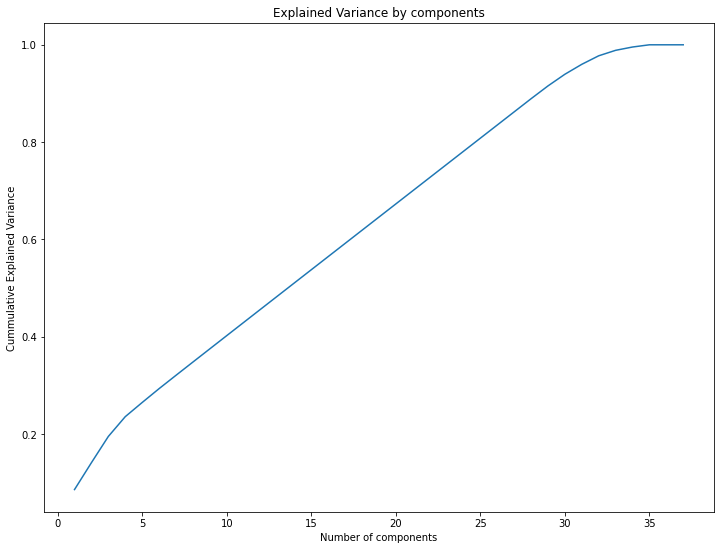

In [18]:
plt.figure(figsize=(12,9))
plt.plot(range(1,38),pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of components')
plt.ylabel('Cummulative Explained Variance')
plt.title('Explained Variance by components')

In [19]:
pca=PCA(n_components=23)

In [20]:
pca.fit(clust_trans_scaled)

PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
p_clust_trans_scaled=pd.DataFrame(pca.transform(clust_trans_scaled))

## Hieriachiarl Clustering

In [24]:
from scipy.cluster.hierarchy import dendrogram,linkage 

In [26]:
hier_clust = linkage(p_clust_trans_scaled, method='ward')

### the number of clusters will be the number of vertical lines intersected by the threshold(distance selected)
* a clear difference is observed when compared to the no-pca method

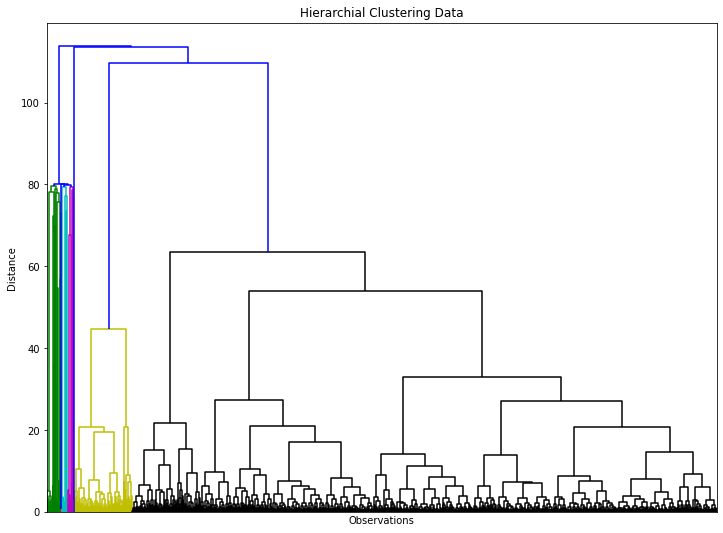

In [27]:
plt.figure(figsize=(12,9))
plt.title('Hierarchial Clustering Data')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,show_leaf_counts=False,no_labels=True,truncate_mode='level')
plt.show()

In [29]:
from sklearn.cluster import KMeans

### the within the sum cluster method choosing optimal clusters also

In [42]:
wcss =[]
for i in range(1,30):
        kmeans=KMeans(n_clusters=i,init='k-means++',random_state=101)
        kmeans.fit(clust_trans_scaled)
        wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

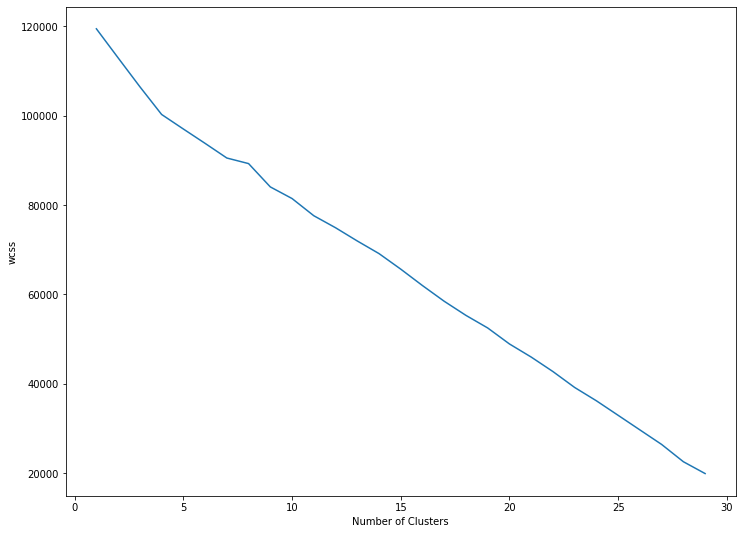

In [43]:
plt.figure(figsize=(12,9))
plt.plot(range(1,30),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')

In [44]:
kmeans=KMeans(n_clusters=30,init='k-means++',random_state=101)

In [45]:
kmeans.fit(p_clust_trans_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [46]:
df_seg_kmeans=df.copy()
df_seg_kmeans['Segment Kmeans']=kmeans.labels_

### Now to see if a divide exists between major and independent movie studios from the clusters

In [51]:
df_seg_kmeans.groupby(['Segment Kmeans']).mean()

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,release_month,release_quarter
Segment Kmeans,,,,,,,,,
0,2.990147e+07,16.949580,5.377569e+07,98.512821,5.577398,398.882241,2006.037037,5.130104,2.034188
1,1.027506e+07,22.382192,3.362737e+07,110.733333,6.926667,521.866667,2005.400000,6.733333,2.466667
2,1.476782e+07,24.490677,6.539050e+07,133.643087,7.152090,698.170418,1975.019293,8.469453,3.070740
3,2.019886e+07,21.885095,4.159554e+07,122.000000,7.255556,609.555556,1992.888889,5.000000,1.888889
4,1.984339e+07,13.019918,6.296073e+07,109.400000,6.600000,327.000000,2004.000000,5.600000,2.200000
5,2.000000e+06,1.699101,8.417330e+05,109.000000,5.300000,14.000000,2011.000000,8.000000,3.000000
6,8.634653e+07,54.920982,2.868563e+08,116.821429,6.571230,2279.339286,2007.267857,7.119048,2.646825
7,3.751469e+07,13.102208,7.953696e+07,122.769231,6.338462,223.846154,2009.461538,5.923077,2.461538
8,1.510000e+07,25.788106,5.232305e+07,122.250000,6.900000,703.250000,2009.000000,5.750000,2.250000


In [50]:
df_seg_kmeans.groupby(['Segment Kmeans']).count()

,cast,crew,budget,genres,keywords,original_language,original_title,popularity,production_companies,production_countries,revenue,runtime,status,vote_average,vote_count,release_year,release_month,release_quarter
Segment Kmeans,,,,,,,,,,,,,,,,,,
0,1053,1053,1053,1053,1053,1053,1053,1053,1053,1053,1053,1053,1053,1053,1053,1053,1053,1053
1,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
2,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311
3,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504
7,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
8,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [60]:
pd.set_option('display.max_rows',None)

In [63]:
pd.set_option('display.max_columns',None)

### a cluster filled with major film studios

In [64]:
df_seg_kmeans[df_seg_kmeans['Segment Kmeans']==23]['production_companies']#.sample(10)

0       ['Ingenious Film Partners', 'Twentieth Century...
1       ['Walt Disney Pictures', 'Jerry Bruckheimer Fi...
2                  ['Columbia Pictures', 'Danjaq', 'B24']
3       ['Legendary Pictures', 'Warner Bros.', 'DC Ent...
5       ['Columbia Pictures', 'Laura Ziskin Production...
6       ['Walt Disney Pictures', 'Walt Disney Animatio...
7       ['Marvel Studios', 'Prime Focus', 'Revolution ...
8                        ['Warner Bros.', 'Heyday Films']
9       ['DC Comics', 'Atlas Entertainment', 'Warner B...
11                                    ['Eon Productions']
12      ['Walt Disney Pictures', 'Jerry Bruckheimer Fi...
14      ['Legendary Pictures', 'Warner Bros.', 'DC Ent...
16               ['Paramount Pictures', 'Marvel Studios']
17      ['Walt Disney Pictures', 'Jerry Bruckheimer Fi...
18      ['Amblin Entertainment', 'Media Magik Entertai...
19      ['WingNut Films', 'New Line Cinema', 'Warner B...
20      ['Columbia Pictures', 'Laura Ziskin Production...
22      ['Wing

### Here, we see a cluster full of independent movie studios but majorly indian

In [59]:
df_seg_kmeans[df_seg_kmeans['Segment Kmeans']==11]['production_companies']#.sample(10)

2423             ['Yash Raj Films', 'Dharma Productions']
2571                               ['Dharma Productions']
2654                                   ['Yash Raj Films']
2745    ['Flicks Motion Pictures', 'UTV Motion Pictures']
2836    ['T-Series', 'Hari Om Entertainment Co.', 'Cap...
3058                              ['UTV Motion Pictures']
3128                                                   []
Name: production_companies, dtype: object

### another cluster with predominantly independent studios,with the only major studio spanish and mexican

In [65]:
df_seg_kmeans[df_seg_kmeans['Segment Kmeans']==1]['production_companies']#.sample(10)

1328    ['Ultra Films', 'TF1 Films Production', 'Canal...
1553    ['Twentieth Century Fox Film Corporation', 'Es...
1806    ['100 Bares', 'Ministerio de Cultura', 'Instit...
2091    ['Estudios Picasso', 'Esperanto Filmoj', 'Tequ...
2263    ['Canal Plus', 'Sogecine', 'Himenóptero', 'Eur...
2530                                         ['El Deseo']
2737                                           ['Filmax']
2754    ['Filmax', 'Signature Entertainment', 'Pinema'...
2781    ['Bésame Mucho Pictures', 'Producciones Anhelo...
2873    ['Vía Digital', 'Eurimages', 'Continental Prod...
2901    ['100 Bares', 'Haddock Films S.R.L.', 'Institu...
2978    ['Arsénico Producciones', 'Zip Films', 'Fine P...
3003                                           ['Filmax']
3018                     ['Altavista Films', 'Zeta Film']
3228                                ['Columbia Pictures']
Name: production_companies, dtype: object

### another cluster filled with predominantly french independent studios  

In [68]:
df_seg_kmeans[df_seg_kmeans['Segment Kmeans']==9]['production_companies']#.sample(10)

233     ['Constantin Film', 'TF1 Films Productions', '...
926                      ['Columbia Pictures', 'Gaumont']
1059    ['France 2 Cinéma', 'France 3 Cinéma', 'Epithè...
1164    ['France 3 Cinéma', 'Claudie Ossard Production...
1542    ['Bac Films', 'Pandora Filmproduktion', 'Proci...
1719    ['M6 Films', 'Les Productions du Trésor', 'Eur...
1799    ['Senator Film Produktion', 'Media Pro Picture...
2036    ['Onyx Films', 'Backup Films', 'France2 Cinéma...
2113    ['Centre National de la Cinématographie', 'TF1...
2213    ['Canal Plus', 'TF1 Films Production', 'Europa...
2226    ['France 2 Cinéma', 'Studio 37', 'Canal+', 'TP...
2251    ['France 3 Cinéma', 'The Kennedy/Marshall Comp...
2297    ['Filmazure', 'Pirol Stiftung', 'Victoires Int...
2327    ['StudioCanal', 'La Parti Productions', 'Les A...
2527    ['Les Films du Losange', 'Wega Film', 'X-Filme...
2552    ['TF1 Films Production', 'Same Player', 'Studi...
2593                    ['Park Ex Pictures', 'Sortie 22']
2612          

### another cluster full of independent studios but japanese

In [71]:
df_seg_kmeans[df_seg_kmeans['Segment Kmeans']==16]['production_companies']

96                        ['Cine Bazar', 'Toho Pictures']
1335    ['Studio Ghibli', 'The Yomiuri Shimbun', 'Haku...
1522                           ['Toei Animation Company']
1748    ['Studio Ghibli', 'Buena Vista Home Entertainm...
1947    ['Miramax Films', 'Studio Ghibli', 'Nibariki',...
1969                                    ['Studio Ghibli']
2379    ['Bandai Visual Company', 'Office Kitano', 'To...
2382    ['Tokyo Broadcasting System (TBS)', 'Mainichi ...
2610    ['Bandai Visual Company', 'Toho Company', 'Mai...
2932    ['TV Tokyo', '4 Kids Entertainment', 'Nintendo...
3114                        ['Toho Film (Eiga) Co. Ltd.']
3167                                     ['Toho Company']
3226                                    ['Daiei Studios']
Name: production_companies, dtype: object

### a cluster filled with russian independent studios

In [75]:
df_seg_kmeans[df_seg_kmeans['Segment Kmeans']==20]['production_companies']

1227    ['Art Pictures Studio', 'Non-Stop Productions'...
1720                                          ['CN Film']
2025    ['Kinokompaniya CTB', 'X-Filme Creative Pool',...
2662    ['Lenfilm Studio', 'Sever Studio', 'Kanal Russ...
2665                              ['Bazelevs Production']
2839    ['Bazelevs Production', 'Channel One Russia', ...
Name: production_companies, dtype: object

## Conclusion

* In short we can conclude that the major and independent studios fall out naturally from the clusters
* The clustering algorithm works excellently in separating the independent studios by the original language